In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
yt_df = pd.read_csv('../.gitignore/data/USvideos.csv')

# View data
yt_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [3]:
# Review null / dtype details
yt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

In [4]:
# `trending_date`
yt_df['publish_time'] = pd.to_datetime(yt_df['publish_time'], errors='coerce')

yt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   video_id                40949 non-null  object             
 1   trending_date           40949 non-null  object             
 2   title                   40949 non-null  object             
 3   channel_title           40949 non-null  object             
 4   category_id             40949 non-null  int64              
 5   publish_time            40949 non-null  datetime64[ns, UTC]
 6   tags                    40949 non-null  object             
 7   views                   40949 non-null  int64              
 8   likes                   40949 non-null  int64              
 9   dislikes                40949 non-null  int64              
 10  comment_count           40949 non-null  int64              
 11  thumbnail_link          40949 non-null  o

In [5]:
category_map = {
    1:  "Film & Animation",
    2:  "Autos & Vehicles",
    10: "Music",
    15: "Pets & Animals",
    17: "Sports",
    19: "Travel & Events",
    20: "Gaming",
    22: "People & Blogs",
    23: "Comedy",
    24: "Entertainment",
    25: "News & Politics",
    26: "How to & Style",
    27: "Education",
    28: "Science & Technology",
    29: "Nonprofits & Activism",
    43: "Shows"
}
yt_df["video_category"] = yt_df["category_id"].map(category_map)
yt_df.sample(15)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,video_category
6738,QXcbVHFE2bo,17.17.12,How-To Make Chocolate Mousse with Matty Matheson,Munchies,24,2017-12-12 12:00:02+00:00,"how to|""cooking""|""Munchies""|""Munchiestv""|""food...",425896,14069,226,573,https://i.ytimg.com/vi/QXcbVHFE2bo/default.jpg,False,False,False,Order today and cook a MUNCHIES Meal Kit recip...,Entertainment
13862,MEEj62ZqFYo,18.24.01,END OF ZE WORLD ...PROBABLY FOR REAL THIS TIME,End of Ze World,22,2018-01-20 22:00:03+00:00,"trump|""donald trump""|""end of the world""|""end o...",223239,4687,1238,839,https://i.ytimg.com/vi/MEEj62ZqFYo/default.jpg,False,False,False,The OFFICIAL sequel to the original End of Ze ...,People & Blogs
15847,tojsUHxmOrQ,18.03.02,Classic Glazed Donuts,Tasty,26,2018-01-31 20:00:24+00:00,"donuts|""glazed""|""glazed donuts""|""krispy kreme""...",392115,14933,208,834,https://i.ytimg.com/vi/tojsUHxmOrQ/default.jpg,False,False,False,Get the recipe: https://tasty.co/recipe/classi...,How to & Style
28617,TTogFxTu_vA,18.14.04,This Giant Kielbasa Helped a Michelin-starred ...,Eater,26,2018-04-09 14:00:03+00:00,"kielbasa|""michelin starred""|""michelin""|""michel...",328056,3346,340,402,https://i.ytimg.com/vi/TTogFxTu_vA/default.jpg,False,False,False,Is this sausage crying cheese?\nSubscribe to o...,How to & Style
39003,1J76wN0TPI4,18.05.06,Sanju | Official Trailer | Ranbir Kapoor | Raj...,FoxStarHindi,24,2018-05-30 07:51:32+00:00,"Sanju|""Official Trailer""|""sanju official trail...",34081968,726240,27525,73915,https://i.ytimg.com/vi/1J76wN0TPI4/default.jpg,False,False,False,Few lives in our times are as dramatic and eni...,Entertainment
30255,azFsk42kb5E,18.22.04,John Krasinski Breaks Down A Quiet Place's Lan...,Vanity Fair,24,2018-04-13 16:00:49+00:00,"a quiet place|""john krasinski""|""a quiet place ...",1332368,37857,332,1781,https://i.ytimg.com/vi/azFsk42kb5E/default.jpg,False,False,False,"In this episode of Notes on a Scene, John Kras...",Entertainment
10340,_yThFcog0nA,18.04.01,45 Beauty Secrets in 5 Minutes—Here’s Everythi...,Vogue,26,2017-12-27 14:00:59+00:00,"beauty|""beauty secrets""|""fashion""|""how to""|""ho...",1409134,39739,1447,969,https://i.ytimg.com/vi/_yThFcog0nA/default.jpg,False,False,False,"There was Kendall and Drew and Miranda​, Chaka...",How to & Style
11243,suqecwk9pdw,18.09.01,"Top 10 Plays of the Night: January 6, 2018",NBA,17,2018-01-07 07:20:36+00:00,"nba|""highlights""|""basketball""|""plays""|""amazing...",417635,3780,400,322,https://i.ytimg.com/vi/suqecwk9pdw/default.jpg,False,False,False,Check out the top 10 plays of the night around...,Sports
22665,Hj3zmfipxqk,18.09.03,KICKFLIPPING THE BRAILLE DROP!,Braille Skateboarding,26,2018-03-04 00:35:27+00:00,"how|""to""|""how-to""|""learn""|""skate""|""skateboard""...",143551,6001,179,610,https://i.ytimg.com/vi/Hj3zmfipxqk/default.jpg,False,False,False,FP Insoles Saved Carlos' feet - get your own h...,How to & Style
39657,JyG5hdbQpDM,18.08.06,FILMING A VIDEO FOR KIM KARDASHIAN'S APP!,Amber Scholl,26,2018-05-26 00:14:41+00:00,"kim kardashian|""kkw beauty""|""everyday makeup""|...",963624,57366,1828,4699,https://i.ytimg.com/vi/JyG5hdbQpDM/default.jpg,False,False,False,HOLY OMG HI ANGELS TODAY WE ARE FILMING A VIDE...,How to & Style


/var/folders/h1/_mf1_n2n22l_q790cb3_c2lr0000gp/T/ipykernel_67961/2003266703.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


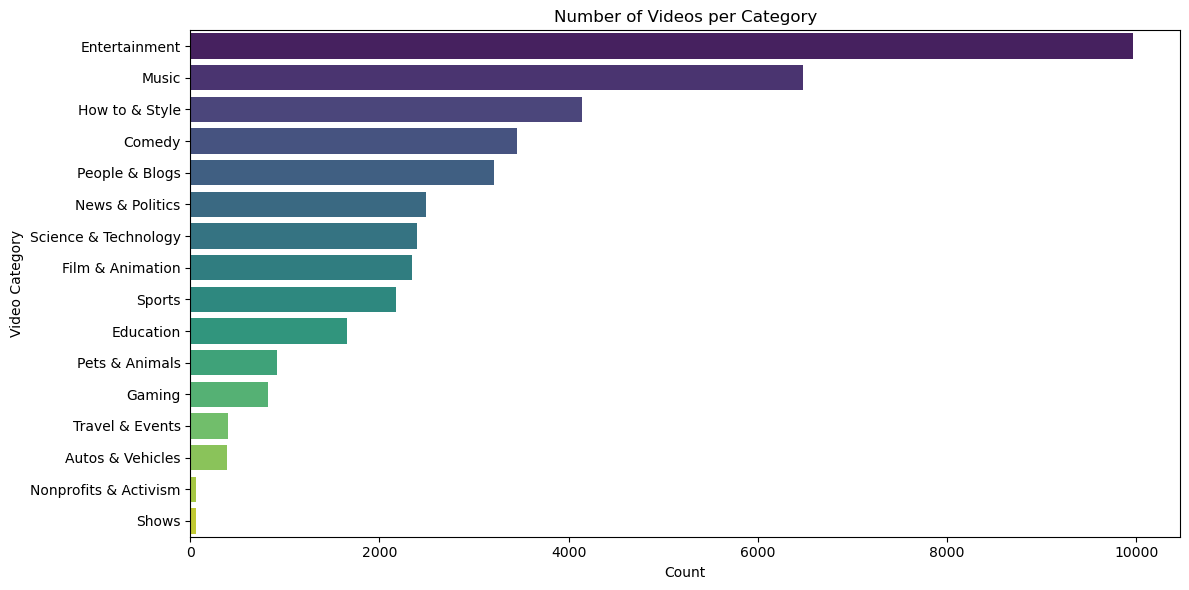

In [6]:
plt.figure(figsize=(12,6))
counts = yt_df['video_category'].value_counts()
sns.barplot(
    y=counts.index,
    x=counts.values,
    palette=sns.color_palette("viridis", len(counts)),
    orient='h',
)
plt.title('Number of Videos per Category')
plt.xlabel('Count')
plt.ylabel('Video Category')
plt.tight_layout()
plt.show()